In [4]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_151"; Java(TM) SE Runtime Environment (build 1.8.0_151-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2m/_st7m7vj0ml5n3mtl1k7t2wr0000gn/T/tmpy3yp19yg
  JVM stdout: /var/folders/2m/_st7m7vj0ml5n3mtl1k7t2wr0000gn/T/tmpy3yp19yg/h2o_sagarsahoo_started_from_python.out
  JVM stderr: /var/folders/2m/_st7m7vj0ml5n3mtl1k7t2wr0000gn/T/tmpy3yp19yg/h2o_sagarsahoo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_sagarsahoo_9wkix9
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [5]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"


# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
df.head()

sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1.11312e+06,0,8,1,6,6,6,0,4,9,12,0,No,1,0.9,0.89,0,No,No,No,Yes,No,Yes
1.11327e+06,0,8,0,2,3,4,1,2,3,3,0,No,0,0.96,0.97,0,No,No,No,Yes,No,Yes
1.11387e+06,20,2,0,45,99,153,16,42,80,111,10,No,0,0.81,0.88,0,No,No,No,Yes,No,Yes
1.11422e+06,0,8,0,9,14,21,5,17,36,43,0,No,0,0.96,0.98,0,No,No,No,Yes,No,Yes
1.11482e+06,0,12,0,31,31,31,7,15,33,47,2,No,3,0.98,0.98,0,No,No,No,Yes,No,Yes
1.11545e+06,55,8,0,216,360,492,30,108,275,340,51,No,0,0,0,0,No,No,Yes,Yes,No,Yes
1.11562e+06,-34,8,0,120,240,240,83,122,144,165,33,No,0,1,0.97,34,No,No,No,Yes,No,Yes
1.11645e+06,4,9,0,43,67,115,5,22,40,58,4,No,0,0.69,0.68,0,No,No,No,Yes,No,Yes
1.11683e+06,2,8,0,4,6,9,1,5,6,9,2,No,0,1,0.95,0,No,No,No,Yes,No,Yes
1.11687e+06,-7,8,0,56,96,112,13,30,56,76,0,No,0,0.97,0.92,7,No,No,No,Yes,No,Yes


In [7]:
y = "went_on_backorder"
x = df.columns
x.remove(y)
x.remove("sku")

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [9]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200316_150622,0.950898,0.182246,0.746848,0.143074,0.227506,0.051759
StackedEnsemble_AllModels_AutoML_20200316_150622,0.950825,0.182266,0.748115,0.149868,0.227822,0.0519027
XGBoost_1_AutoML_20200316_150622,0.949064,0.172326,0.741494,0.15152,0.225397,0.0508037
GBM_4_AutoML_20200316_150622,0.948844,0.173579,0.738303,0.157246,0.22659,0.051343
XGBoost_3_AutoML_20200316_150622,0.948233,0.173241,0.743872,0.152186,0.226285,0.0512049
XGBoost_2_AutoML_20200316_150622,0.947446,0.174435,0.736034,0.156971,0.226717,0.0514008
GBM_3_AutoML_20200316_150622,0.946825,0.177091,0.731396,0.147716,0.22862,0.0522671
GBM_2_AutoML_20200316_150622,0.945111,0.179764,0.725309,0.166382,0.230232,0.0530067
GBM_5_AutoML_20200316_150622,0.945026,0.17789,0.729282,0.14231,0.229819,0.0528166
GBM_1_AutoML_20200316_150622,0.942464,0.183815,0.719098,0.15893,0.232004,0.0538257


In [10]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200316_150622,0.950898,0.182246,0.746848,0.143074,0.227506,0.051759
StackedEnsemble_AllModels_AutoML_20200316_150622,0.950825,0.182266,0.748115,0.149868,0.227822,0.0519027
XGBoost_1_AutoML_20200316_150622,0.949064,0.172326,0.741494,0.15152,0.225397,0.0508037
GBM_4_AutoML_20200316_150622,0.948844,0.173579,0.738303,0.157246,0.22659,0.051343
XGBoost_3_AutoML_20200316_150622,0.948233,0.173241,0.743872,0.152186,0.226285,0.0512049
XGBoost_2_AutoML_20200316_150622,0.947446,0.174435,0.736034,0.156971,0.226717,0.0514008
GBM_3_AutoML_20200316_150622,0.946825,0.177091,0.731396,0.147716,0.22862,0.0522671
GBM_2_AutoML_20200316_150622,0.945111,0.179764,0.725309,0.166382,0.230232,0.0530067
GBM_5_AutoML_20200316_150622,0.945026,0.17789,0.729282,0.14231,0.229819,0.0528166
GBM_1_AutoML_20200316_150622,0.942464,0.183815,0.719098,0.15893,0.232004,0.0538257


In [11]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [12]:
metalearner.coef_norm()

{'Intercept': -2.9326903190245517,
 'XGBoost_1_AutoML_20200316_150622': 0.4252357816836839,
 'GBM_4_AutoML_20200316_150622': 0.26540981325921886,
 'XGBoost_3_AutoML_20200316_150622': 0.3482435380690245,
 'XGBoost_2_AutoML_20200316_150622': 0.02926306362290119,
 'GBM_3_AutoML_20200316_150622': 0.0,
 'GBM_2_AutoML_20200316_150622': 0.0,
 'GBM_5_AutoML_20200316_150622': 0.12652837432927136,
 'GBM_1_AutoML_20200316_150622': 0.06791276432249407,
 'DRF_1_AutoML_20200316_150622': 0.5068097430803735,
 'GLM_1_AutoML_20200316_150622': 0.06130959745437955}

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


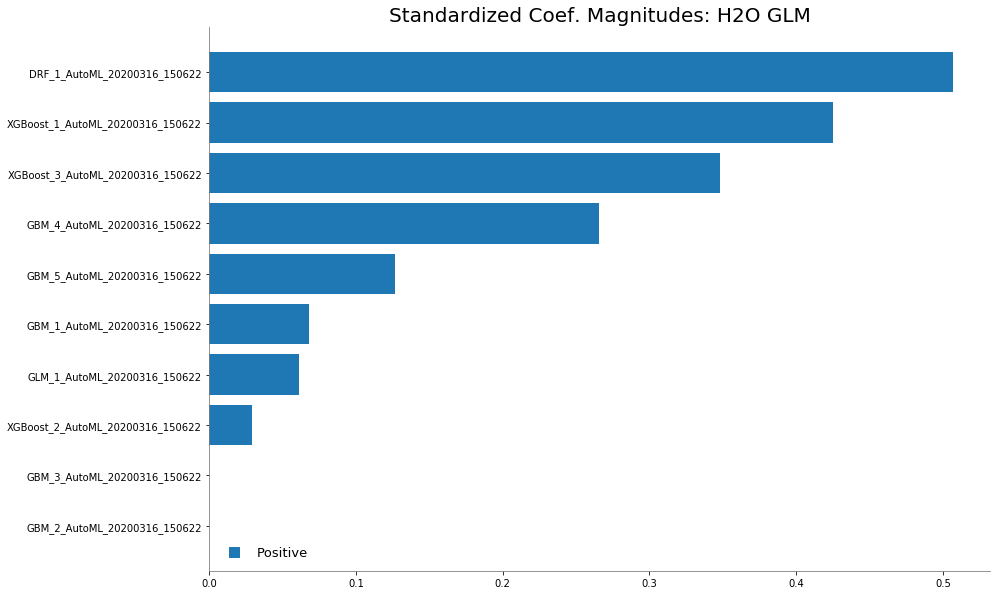

In [13]:
%matplotlib inline
metalearner.std_coef_plot()

In [15]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200316_150622


Model Summary: 


,,number_of_trees
0,,145.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.034339326627586174
RMSE: 0.18530873327392364
LogLoss: 0.12157376628493823
Mean Per-Class Error: 0.07559865257395892
AUC: 0.9782223230885541
AUCPR: 0.8907854427032674
Gini: 0.9564446461771081

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39204472601413726: 


,,No,Yes,Error,Rate
0,No,16348.0,439.0,0.0262,(439.0/16787.0)
1,Yes,425.0,1841.0,0.1876,(425.0/2266.0)
2,Total,16773.0,2280.0,0.0453,(864.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.392045,0.809943,189.0
1,max f2,0.206365,0.846028,254.0
2,max f0point5,0.590869,0.846299,133.0
3,max accuracy,0.478959,0.955283,164.0
4,max precision,0.982356,1.000000,0.0
5,max recall,0.002652,1.000000,396.0
6,max specificity,0.982356,1.000000,0.0
7,max absolute_mcc,0.392045,0.784203,189.0
8,max min_per_class_accuracy,0.173988,0.922771,266.0
9,max mean_per_class_accuracy,0.142222,0.924401,279.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.937758,8.408208,8.408208,1.000000,0.954718,1.000000,0.954718,0.084289,0.084289,740.820830,740.820830
1,,2,0.020049,0.903646,8.320164,8.364186,0.989529,0.919707,0.994764,0.937212,0.083407,0.167696,732.016423,736.418626
2,,3,0.030022,0.876551,8.408208,8.378809,1.000000,0.890124,0.996503,0.921571,0.083848,0.251545,740.820830,737.880897
3,,4,0.040046,0.840981,8.100054,8.309029,0.963351,0.858885,0.988204,0.905879,0.081200,0.332745,710.005407,730.902891
4,,5,0.050018,0.798992,8.009925,8.249396,0.952632,0.821757,0.981112,0.889108,0.079876,0.412621,700.992475,724.939639
5,,6,0.100037,0.509417,6.352476,7.300936,0.755509,0.664923,0.868311,0.777015,0.317741,0.730362,535.247636,630.093638
6,,7,0.150003,0.252357,3.100085,5.901633,0.368697,0.368329,0.701889,0.640882,0.154898,0.885260,210.008520,490.163256
7,,8,0.200021,0.121890,1.173444,4.719275,0.139559,0.180926,0.561270,0.525863,0.058694,0.943954,17.344355,371.927514
8,,9,0.300110,0.040968,0.357139,3.264467,0.042475,0.071357,0.388248,0.374281,0.035746,0.979700,-64.286058,226.446702
9,,10,0.399990,0.020535,0.176736,2.493446,0.021019,0.028753,0.296549,0.288001,0.017652,0.997352,-82.326415,149.344584




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.05080368545754588
RMSE: 0.22539672903027202
LogLoss: 0.1723257121853292
Mean Per-Class Error: 0.11266162280094116
AUC: 0.9490638008407191
AUCPR: 0.7414942599385549
Gini: 0.8981276016814381

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3176090154382918: 


,,No,Yes,Error,Rate
0,No,15967.0,820.0,0.0488,(820.0/16787.0)
1,Yes,576.0,1690.0,0.2542,(576.0/2266.0)
2,Total,16543.0,2510.0,0.0733,(1396.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.317609,0.707705,212.0
1,max f2,0.119843,0.775463,291.0
2,max f0point5,0.510532,0.733633,151.0
3,max accuracy,0.510532,0.932609,151.0
4,max precision,0.982321,1.000000,0.0
5,max recall,0.002167,1.000000,398.0
6,max specificity,0.982321,1.000000,0.0
7,max absolute_mcc,0.317609,0.667084,212.0
8,max min_per_class_accuracy,0.119843,0.887026,291.0
9,max mean_per_class_accuracy,0.119843,0.887338,291.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.70 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.927304,7.527768,7.527768,0.895288,0.947523,0.895288,0.947523,0.075463,0.075463,652.776764,652.776764
1,,2,0.020049,0.892485,7.175591,7.351680,0.853403,0.910579,0.874346,0.929051,0.071933,0.147396,617.559137,635.167951
2,,3,0.030022,0.860069,7.080596,7.261634,0.842105,0.875529,0.863636,0.911273,0.070609,0.218005,608.059646,626.163444
3,,4,0.040046,0.825172,7.219613,7.251115,0.858639,0.842937,0.862385,0.894166,0.072374,0.290380,621.961341,625.111541
4,,5,0.050018,0.780220,6.992089,7.199473,0.831579,0.803178,0.856243,0.876026,0.069726,0.360106,599.208900,619.947321
5,,6,0.100037,0.481890,5.531948,6.365711,0.657922,0.634562,0.757083,0.755294,0.276699,0.636805,453.194817,536.571069
6,,7,0.150003,0.249216,3.029428,5.254395,0.360294,0.355085,0.624913,0.621984,0.151368,0.788173,202.942799,425.439469
7,,8,0.200021,0.124991,1.835160,4.399362,0.218258,0.178907,0.523222,0.511186,0.091792,0.879965,83.515984,339.936167
8,,9,0.300005,0.042459,0.639995,3.146459,0.076115,0.074474,0.374213,0.365641,0.063989,0.943954,-36.000514,214.645863
9,,10,0.399990,0.021069,0.255998,2.423938,0.030446,0.030049,0.288282,0.281754,0.025596,0.969550,-74.400206,142.393828




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9280955,0.0051164487,0.92941487,0.9244293,0.9270533,0.93622047,0.9233596
1,auc,0.949095,0.0065504755,0.9531871,0.9477953,0.9471211,0.9573163,0.94005543
2,aucpr,0.7411286,0.021258956,0.7433187,0.7225799,0.73947495,0.77557063,0.7246989
3,err,0.07190451,0.0051164487,0.07058515,0.07557072,0.072946735,0.063779525,0.07664042
4,err_count,274.0,19.506409,269.0,288.0,278.0,243.0,292.0
5,f0point5,0.6933212,0.022892758,0.6965572,0.6768122,0.6899453,0.73048407,0.6728074
6,f1,0.7111567,0.015731381,0.7212435,0.70124483,0.70235544,0.73384446,0.69709545
7,f2,0.73018205,0.012628284,0.7477439,0.72750753,0.7152202,0.7372359,0.72320276
8,lift_top_group,7.502786,0.3563422,7.3180842,7.118526,7.9813776,7.763627,7.3323145
9,logloss,0.17232555,0.008958179,0.16888846,0.1753458,0.17587112,0.15887432,0.18264805



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-16 15:07:26,1 min 4.287 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.881069
1,,2020-03-16 15:07:27,1 min 4.683 sec,5.0,0.415387,0.536065,0.946409,0.770077,8.145452,0.071275
2,,2020-03-16 15:07:27,1 min 5.032 sec,10.0,0.353692,0.432416,0.952116,0.789314,8.188098,0.067129
3,,2020-03-16 15:07:28,1 min 5.413 sec,15.0,0.308493,0.358902,0.955046,0.795398,8.232120,0.063979
4,,2020-03-16 15:07:28,1 min 5.743 sec,20.0,0.277087,0.306815,0.956703,0.805695,8.232120,0.062247
5,,2020-03-16 15:07:28,1 min 6.117 sec,25.0,0.254613,0.267506,0.959035,0.812773,8.364186,0.062772
6,,2020-03-16 15:07:29,1 min 6.518 sec,30.0,0.240280,0.240159,0.960686,0.819855,8.320164,0.059623
7,,2020-03-16 15:07:29,1 min 6.860 sec,35.0,0.229141,0.217365,0.962357,0.824514,8.364186,0.059466
8,,2020-03-16 15:07:29,1 min 7.260 sec,40.0,0.221452,0.199972,0.963646,0.828596,8.364186,0.058259
9,,2020-03-16 15:07:30,1 min 7.657 sec,45.0,0.216005,0.186741,0.964898,0.833215,8.364186,0.058416



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,national_inv,17868.779297,1.000000,0.292773
1,forecast_3_month,6389.555664,0.357582,0.104690
2,forecast_6_month,4553.881836,0.254851,0.074614
3,forecast_9_month,4389.659668,0.245661,0.071923
4,sales_3_month,3540.736328,0.198152,0.058014
5,sales_9_month,3507.767090,0.196307,0.057473
6,sales_6_month,3501.885254,0.195978,0.057377
7,sales_1_month,3486.688721,0.195127,0.057128
8,perf_12_month_avg,3137.353516,0.175577,0.051404
9,perf_6_month_avg,2588.896973,0.144884,0.042418



See the whole table with table.as_data_frame()


In [16]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [17]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_1_AutoML_20200316_150622',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_1_AutoML_20200316_150622'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_product_backorders.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_product_backorders.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modul

In [18]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.05,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 5.0,
  'nthread': 4,
  'seed': 1,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 145,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'auto'},
 145)

In [19]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200316_150622


Model Summary: 


,,number_of_trees
0,,145.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.034339326627586174
RMSE: 0.18530873327392364
LogLoss: 0.12157376628493823
Mean Per-Class Error: 0.07559865257395892
AUC: 0.9782223230885541
AUCPR: 0.8907854427032674
Gini: 0.9564446461771081

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39204472601413726: 


,,No,Yes,Error,Rate
0,No,16348.0,439.0,0.0262,(439.0/16787.0)
1,Yes,425.0,1841.0,0.1876,(425.0/2266.0)
2,Total,16773.0,2280.0,0.0453,(864.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.392045,0.809943,189.0
1,max f2,0.206365,0.846028,254.0
2,max f0point5,0.590869,0.846299,133.0
3,max accuracy,0.478959,0.955283,164.0
4,max precision,0.982356,1.000000,0.0
5,max recall,0.002652,1.000000,396.0
6,max specificity,0.982356,1.000000,0.0
7,max absolute_mcc,0.392045,0.784203,189.0
8,max min_per_class_accuracy,0.173988,0.922771,266.0
9,max mean_per_class_accuracy,0.142222,0.924401,279.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.937758,8.408208,8.408208,1.000000,0.954718,1.000000,0.954718,0.084289,0.084289,740.820830,740.820830
1,,2,0.020049,0.903646,8.320164,8.364186,0.989529,0.919707,0.994764,0.937212,0.083407,0.167696,732.016423,736.418626
2,,3,0.030022,0.876551,8.408208,8.378809,1.000000,0.890124,0.996503,0.921571,0.083848,0.251545,740.820830,737.880897
3,,4,0.040046,0.840981,8.100054,8.309029,0.963351,0.858885,0.988204,0.905879,0.081200,0.332745,710.005407,730.902891
4,,5,0.050018,0.798992,8.009925,8.249396,0.952632,0.821757,0.981112,0.889108,0.079876,0.412621,700.992475,724.939639
5,,6,0.100037,0.509417,6.352476,7.300936,0.755509,0.664923,0.868311,0.777015,0.317741,0.730362,535.247636,630.093638
6,,7,0.150003,0.252357,3.100085,5.901633,0.368697,0.368329,0.701889,0.640882,0.154898,0.885260,210.008520,490.163256
7,,8,0.200021,0.121890,1.173444,4.719275,0.139559,0.180926,0.561270,0.525863,0.058694,0.943954,17.344355,371.927514
8,,9,0.300110,0.040968,0.357139,3.264467,0.042475,0.071357,0.388248,0.374281,0.035746,0.979700,-64.286058,226.446702
9,,10,0.399990,0.020535,0.176736,2.493446,0.021019,0.028753,0.296549,0.288001,0.017652,0.997352,-82.326415,149.344584




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.05080368545754588
RMSE: 0.22539672903027202
LogLoss: 0.1723257121853292
Mean Per-Class Error: 0.11266162280094116
AUC: 0.9490638008407191
AUCPR: 0.7414942599385549
Gini: 0.8981276016814381

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3176090154382918: 


,,No,Yes,Error,Rate
0,No,15967.0,820.0,0.0488,(820.0/16787.0)
1,Yes,576.0,1690.0,0.2542,(576.0/2266.0)
2,Total,16543.0,2510.0,0.0733,(1396.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.317609,0.707705,212.0
1,max f2,0.119843,0.775463,291.0
2,max f0point5,0.510532,0.733633,151.0
3,max accuracy,0.510532,0.932609,151.0
4,max precision,0.982321,1.000000,0.0
5,max recall,0.002167,1.000000,398.0
6,max specificity,0.982321,1.000000,0.0
7,max absolute_mcc,0.317609,0.667084,212.0
8,max min_per_class_accuracy,0.119843,0.887026,291.0
9,max mean_per_class_accuracy,0.119843,0.887338,291.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.70 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.927304,7.527768,7.527768,0.895288,0.947523,0.895288,0.947523,0.075463,0.075463,652.776764,652.776764
1,,2,0.020049,0.892485,7.175591,7.351680,0.853403,0.910579,0.874346,0.929051,0.071933,0.147396,617.559137,635.167951
2,,3,0.030022,0.860069,7.080596,7.261634,0.842105,0.875529,0.863636,0.911273,0.070609,0.218005,608.059646,626.163444
3,,4,0.040046,0.825172,7.219613,7.251115,0.858639,0.842937,0.862385,0.894166,0.072374,0.290380,621.961341,625.111541
4,,5,0.050018,0.780220,6.992089,7.199473,0.831579,0.803178,0.856243,0.876026,0.069726,0.360106,599.208900,619.947321
5,,6,0.100037,0.481890,5.531948,6.365711,0.657922,0.634562,0.757083,0.755294,0.276699,0.636805,453.194817,536.571069
6,,7,0.150003,0.249216,3.029428,5.254395,0.360294,0.355085,0.624913,0.621984,0.151368,0.788173,202.942799,425.439469
7,,8,0.200021,0.124991,1.835160,4.399362,0.218258,0.178907,0.523222,0.511186,0.091792,0.879965,83.515984,339.936167
8,,9,0.300005,0.042459,0.639995,3.146459,0.076115,0.074474,0.374213,0.365641,0.063989,0.943954,-36.000514,214.645863
9,,10,0.399990,0.021069,0.255998,2.423938,0.030446,0.030049,0.288282,0.281754,0.025596,0.969550,-74.400206,142.393828




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9280955,0.0051164487,0.92941487,0.9244293,0.9270533,0.93622047,0.9233596
1,auc,0.949095,0.0065504755,0.9531871,0.9477953,0.9471211,0.9573163,0.94005543
2,aucpr,0.7411286,0.021258956,0.7433187,0.7225799,0.73947495,0.77557063,0.7246989
3,err,0.07190451,0.0051164487,0.07058515,0.07557072,0.072946735,0.063779525,0.07664042
4,err_count,274.0,19.506409,269.0,288.0,278.0,243.0,292.0
5,f0point5,0.6933212,0.022892758,0.6965572,0.6768122,0.6899453,0.73048407,0.6728074
6,f1,0.7111567,0.015731381,0.7212435,0.70124483,0.70235544,0.73384446,0.69709545
7,f2,0.73018205,0.012628284,0.7477439,0.72750753,0.7152202,0.7372359,0.72320276
8,lift_top_group,7.502786,0.3563422,7.3180842,7.118526,7.9813776,7.763627,7.3323145
9,logloss,0.17232555,0.008958179,0.16888846,0.1753458,0.17587112,0.15887432,0.18264805



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-16 15:07:26,1 min 4.287 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.881069
1,,2020-03-16 15:07:27,1 min 4.683 sec,5.0,0.415387,0.536065,0.946409,0.770077,8.145452,0.071275
2,,2020-03-16 15:07:27,1 min 5.032 sec,10.0,0.353692,0.432416,0.952116,0.789314,8.188098,0.067129
3,,2020-03-16 15:07:28,1 min 5.413 sec,15.0,0.308493,0.358902,0.955046,0.795398,8.232120,0.063979
4,,2020-03-16 15:07:28,1 min 5.743 sec,20.0,0.277087,0.306815,0.956703,0.805695,8.232120,0.062247
5,,2020-03-16 15:07:28,1 min 6.117 sec,25.0,0.254613,0.267506,0.959035,0.812773,8.364186,0.062772
6,,2020-03-16 15:07:29,1 min 6.518 sec,30.0,0.240280,0.240159,0.960686,0.819855,8.320164,0.059623
7,,2020-03-16 15:07:29,1 min 6.860 sec,35.0,0.229141,0.217365,0.962357,0.824514,8.364186,0.059466
8,,2020-03-16 15:07:29,1 min 7.260 sec,40.0,0.221452,0.199972,0.963646,0.828596,8.364186,0.058259
9,,2020-03-16 15:07:30,1 min 7.657 sec,45.0,0.216005,0.186741,0.964898,0.833215,8.364186,0.058416



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,national_inv,17868.779297,1.000000,0.292773
1,forecast_3_month,6389.555664,0.357582,0.104690
2,forecast_6_month,4553.881836,0.254851,0.074614
3,forecast_9_month,4389.659668,0.245661,0.071923
4,sales_3_month,3540.736328,0.198152,0.058014
5,sales_9_month,3507.767090,0.196307,0.057473
6,sales_6_month,3501.885254,0.195978,0.057377
7,sales_1_month,3486.688721,0.195127,0.057128
8,perf_12_month_avg,3137.353516,0.175577,0.051404
9,perf_6_month_avg,2588.896973,0.144884,0.042418



See the whole table with table.as_data_frame()


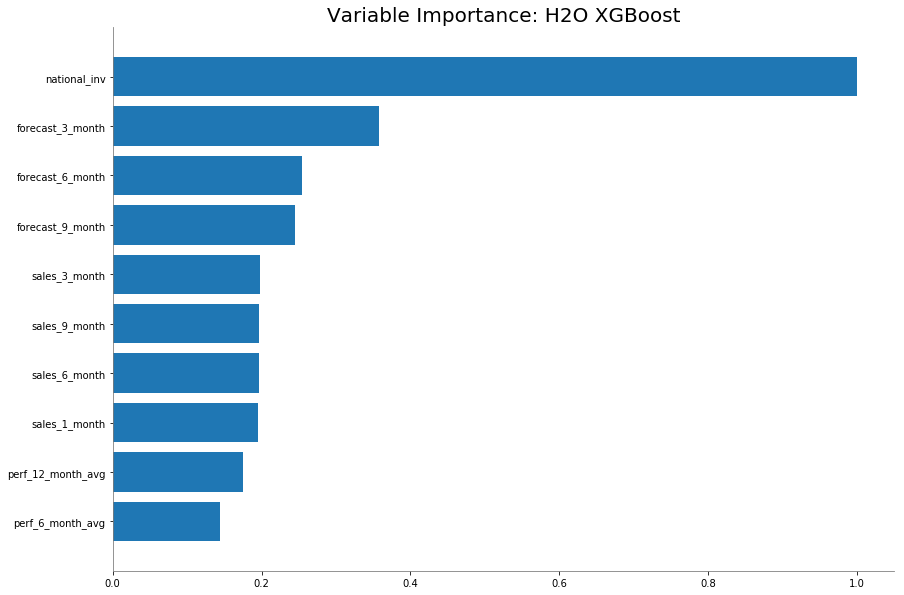

In [20]:
out.varimp_plot()

In [21]:
aml.leader.download_mojo(path = "./")

'/Users/sagarsahoo/StackedEnsemble_BestOfFamily_AutoML_20200316_150622.zip'